# Validate community benchmark
Last modification: 2024.01.16.</br>

# Initiate

In [1]:
import numpy as np
from seas_tools import SEAS
import myplots
import matplotlib.pylab as plt
plt.rcParams['font.size'] = '15'

mp = myplots.Figpref()
yr2sec = 365*24*60*60
stloc = None

bp_ver = 6
scheme = 'qd'
mode = 's'
full_ver_name = 'bp%d-%s-%s'%(bp_ver,scheme,mode)

if mode == 'a':
    hf = 500
elif mode == 's':
    hf = 100
    # hf = 50
mine = SEAS('yun',full_ver_name,'k',hf)
dalzilio = SEAS('dalzilio',full_ver_name,mp.mypink,10)
kim = SEAS('kim',full_ver_name,mp.mygreen,10)
ozawa = SEAS('ozawa',full_ver_name,mp.myblue,10)
romanet = SEAS('romanet',full_ver_name,mp.myviolet,10)

if mode == 'a':
    marcum = SEAS('marcum',full_ver_name,mp.myorange,100)
    scenario_list = [mine,marcum,romanet,ozawa,kim,dalzilio]
else:
    scenario_list = [mine,romanet,ozawa,kim,dalzilio]

# Read outputs

## On-fault outputs

In [2]:
stloc = 7.5e3
template = mine.onfault_suffix(stloc)

# mine.read_onfault_at_depth(stloc)
dalzilio.read_onfault_at_depth(stloc)
ozawa.read_onfault_at_depth(stloc)
kim.read_onfault_at_depth(stloc)
romanet.read_onfault_at_depth(stloc)
if mode == 'a': marcum.read_onfault_at_depth(stloc)

Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/fltst_strk+75.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/fltst_strk+75.dat


In [3]:
for stloc in [-1.5,0.,0.5,1.,1.5,2.5,3.5,5.0,7.5]:
    mine.read_onfault_at_depth(stloc*1e3)
    print(len(mine.t))

No existing data file - write it


No existing darcy_velocity data - compute it
Save data... Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079
No existing data file - write it
Load existing darcy_velocity data
Saved!
6079


## Global output

In [5]:
dalzilio.read_global_outputs()
ozawa.read_global_outputs()
kim.read_global_outputs()
romanet.read_global_outputs()
if mode == 'a': marcum.read_global_outputs()
mine.read_global_outputs()

Load /export/dump/jyun/BP6/comparison/dalzilio_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/ozawa_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/kim_S_10m/global.dat
Load /export/dump/jyun/BP6/comparison/romanet_S_10m/global.dat
No existing data file - write it
Saved!


## Save evolution outputs

In [6]:
# -- Process raw data if it's first time loading the result
if mine.bpNum == 6:
    for target_var in ['slip','shear_stress','normal_stress','darcy_vel']:
        mine.save_evolution_BP6(target_var,save_on=True,new_fname=None)

Saved!
Saved!
Saved!
Load existing darcy_velocity data
Saved!


# Plot on-fault outputs

## All on-fault ouptputs

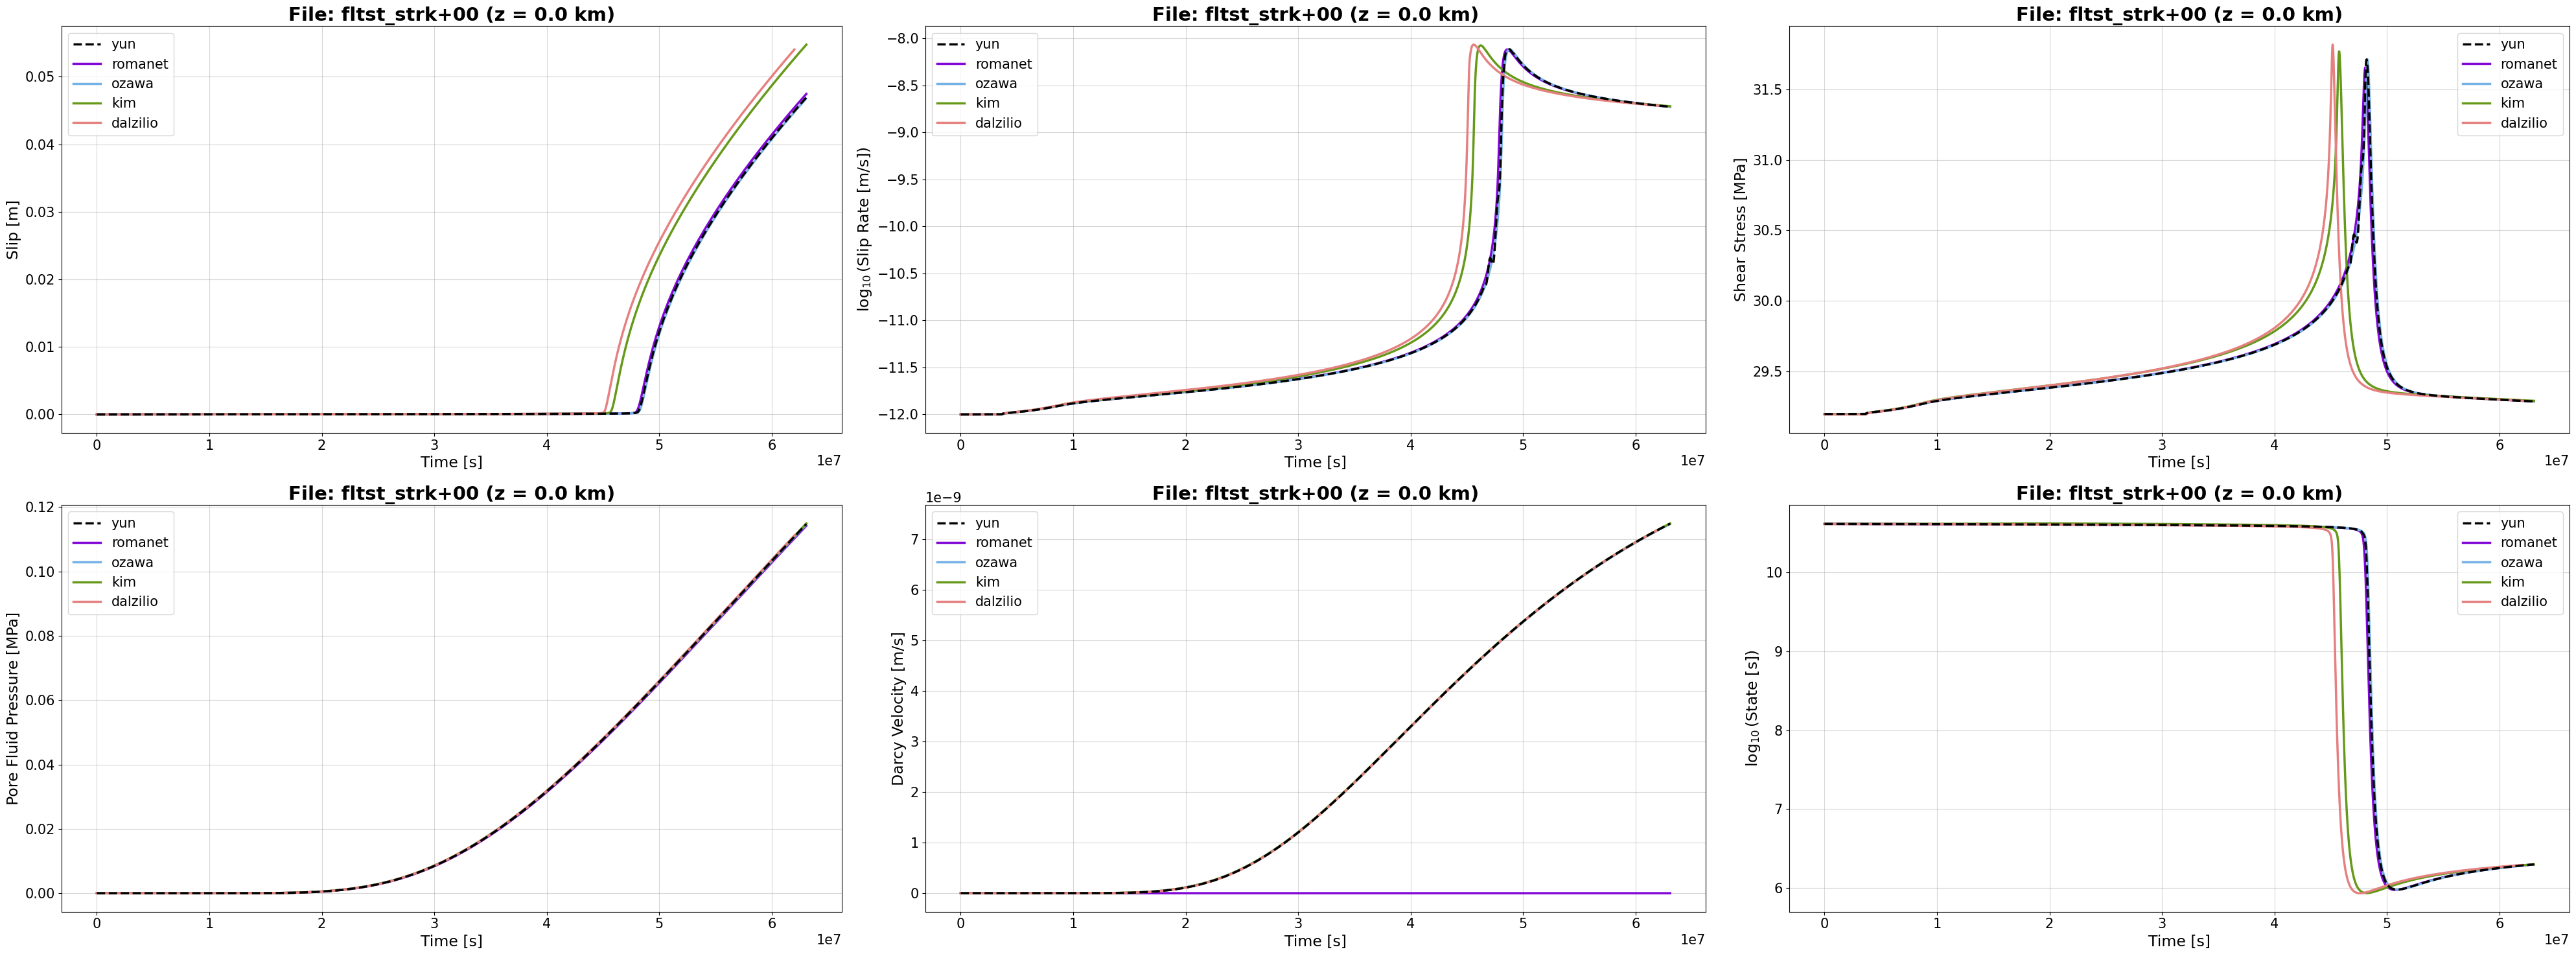

In [4]:
save_on = 1
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(40,15))
mine.line_plot_macro(ax[0,0],stloc,scenario_list,'slip')
mine.line_plot_macro(ax[0,1],stloc,scenario_list,'slip_rate')
mine.line_plot_macro(ax[0,2],stloc,scenario_list,'shear_stress')
mine.line_plot_macro(ax[1,0],stloc,scenario_list,'pore_pressure')
mine.line_plot_macro(ax[1,1],stloc,scenario_list,'darcy_vel')
mine.line_plot_macro(ax[1,2],stloc,scenario_list,'state')
plt.tight_layout()
if save_on: plt.savefig('%s/all_onfault_outputs_%s.png'%(mine.my_output_dir,template[-7:]),dpi=300)
plt.show()

## All global outputs

In [ ]:
save_on = 0
fig,ax=plt.subplots(nrows=2,figsize=(12,15))
mine.line_plot_macro(ax[0],None,scenario_list,'max_slip_rate')
mine.line_plot_macro(ax[1],None,scenario_list,'moment_rate')
plt.tight_layout()
if save_on: plt.savefig('%s/all_global_outputs.png'%(mine.my_output_dir),dpi=300)
plt.show()

## Individual variable

In [ ]:
save_on = 0
fig,ax=plt.subplots(figsize=(12,6))
# target_var = 'slip'
# target_var = 'slip_rate'
# target_var = 'shear_stress'
# target_var = 'normal_stress'
# target_var = 'pore_pressure'
# target_var = 'darcy_vel'
# target_var = 'state'
target_var = 'max_slip_rate'
# target_var = 'moment_rate'
mine.line_plot_macro(ax,stloc,scenario_list,target_var)
plt.tight_layout()
if save_on: 
    if target_var == 'max_slip_rate' or target_var == 'moment_rate':
        plt.savefig('%s/%s.png'%(mine.my_output_dir,target_var),dpi=300)
    else:
        plt.savefig('%s/%s_at_%s.png'%(mine.my_output_dir,target_var,template[-7:]),dpi=300)
else:
    if target_var == 'max_slip_rate' or target_var == 'moment_rate':
        print('%s/%s.png'%(mine.my_output_dir,target_var))
    else:
        print('%s/%s_at_%s.png'%(mine.my_output_dir,target_var,template[-7:]))
plt.show()

## Single model

In [ ]:
save_on = 0
scenario = [marcum]
fig,ax=plt.subplots(ncols=3,nrows=2,figsize=(40,15))
mine.line_plot_macro(ax[0,0],stloc,scenario,'slip')
mine.line_plot_macro(ax[0,1],stloc,scenario,'slip_rate')
mine.line_plot_macro(ax[0,2],stloc,scenario,'shear_stress')
mine.line_plot_macro(ax[1,0],stloc,scenario,'pore_pressure')
mine.line_plot_macro(ax[1,1],stloc,scenario,'darcy_vel')
mine.line_plot_macro(ax[1,2],stloc,scenario,'state')
plt.tight_layout()
if save_on: plt.savefig('%s/all_onfault_outputs_%s.png'%(mine.my_output_dir,template[-7:]),dpi=300)
plt.show()